# 1 estimate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Gaussian kernel, linear model
def estimate(x, y, x0, h):
    w = np.exp(-(x-x0)**2/h)
    W = np.diag(w)
    x = x[:,None]
    X = np.concatenate(
        (np.ones(shape = x.shape),
        x-x0), axis = 1
    )
    B = np.linalg.inv(X.T@W@X)@X.T@W@y
    y_hat = B[0]
    return y_hat

# 2 Generate data

In [3]:
np.random.seed(15)
n = 30
x = np.random.uniform(size=(n,))
y = 1-4*(x-0.5)**2+0.3*np.random.normal(size = (n,))
xhat = np.linspace(0,1,10)
yhat = np.array([estimate(x, y, x0, 0.2) for x0 in xhat])

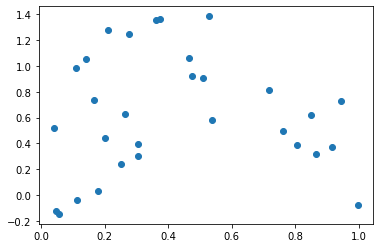

In [4]:
plt.scatter(x, y)

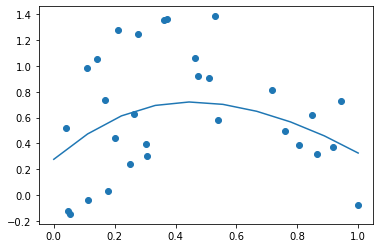

In [5]:
plt.scatter(x, y)
plt.plot(xhat, yhat)

# 3 LOOCV

In [6]:
h = np.arange(0.01, 0.5, 0.01)
def loocv(x, y):
    error_loocv_h = []
    best_error = np.Inf
    best_index = -1
    for j in h:
        loocv_error = 0
        for i in range(len(x)):
            xx = np.delete(x, i)
            yy = np.delete(y, i)
            yhat = np.array(estimate(xx, yy, x[i], j))
            error = ((yhat-y[i])**2).sum()
            loocv_error+=error
        error_loocv_h.append(loocv_error)
        if best_error>loocv_error:
            best_error=loocv_error
            best_index = j
    
    print(f'The best h is {best_index}')
    return error_loocv_h

In [8]:
error_loocv_h = loocv(x, y)

The best h is 0.06999999999999999


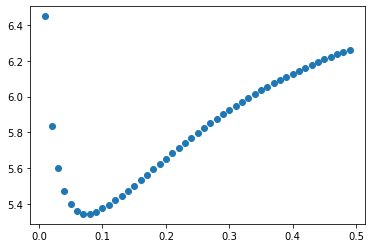

In [9]:
plt.scatter(h, error_loocv_h)

In [10]:
yhat = np.array([estimate(x, y, x0, 0.06999999999999999) for x0 in xhat])

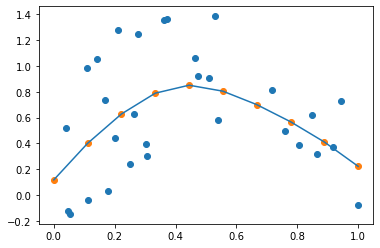

In [11]:
plt.scatter(x, y)
plt.scatter(xhat, yhat)
plt.plot(xhat, yhat)

# 4 test other function

## a

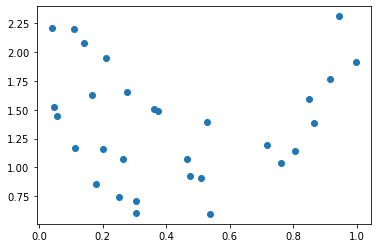

In [12]:
np.random.seed(15)
n = 30
x = np.random.uniform(size=(n,))
y = 1+4*(x-0.5)**2+0.3*np.random.normal(size = (n,))
xhat = np.linspace(0,1,10)
#yhat = np.array(estimate(x, y, 0.111, 0.2))
yhat = np.array([estimate(x, y, x0, 0.01) for x0 in xhat])
plt.scatter(x, y)

In [13]:
error_loocv_h = loocv(x, y)

The best h is 0.060000000000000005


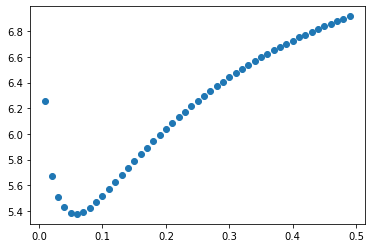

In [14]:
plt.scatter(h, error_loocv_h)

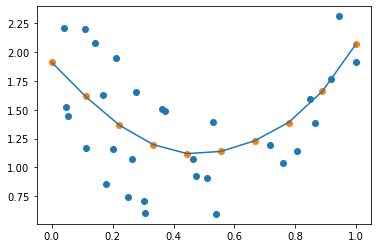

In [15]:
yhat = np.array([estimate(x, y, x0, 0.060000000000000005) for x0 in xhat])
plt.scatter(x, y)
plt.scatter(xhat, yhat)
plt.plot(xhat, yhat)

# b

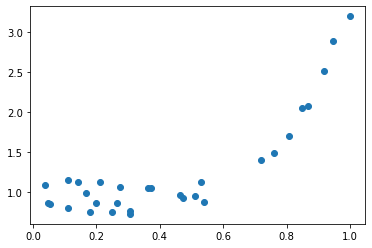

In [16]:
np.random.seed(15)
n = 30
x = np.random.uniform(size=(n,))
y = 1+4*(x-0.5)**2+2*(x-0.8)**3+3*(x-0.2)**4+0.1*np.random.normal(size = (n,))
xhat = np.linspace(0,1,10)
#yhat = np.array(estimate(x, y, 0.111, 0.2))
yhat = np.array([estimate(x, y, x0, 0.01) for x0 in xhat])
plt.scatter(x, y)

In [17]:
error_loocv_h = loocv(x, y)

The best h is 0.01


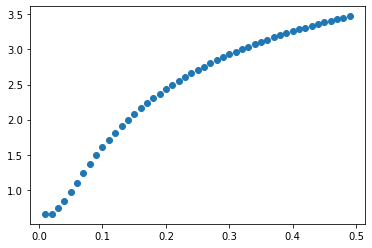

In [18]:
plt.scatter(h, error_loocv_h)

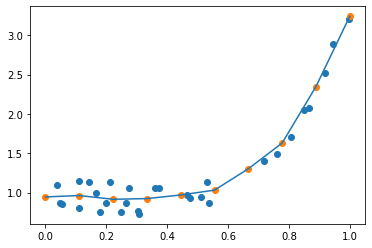

In [19]:
yhat = np.array([estimate(x, y, x0, 0.01) for x0 in xhat])
plt.scatter(x, y)
plt.scatter(xhat, yhat)
plt.plot(xhat, yhat)

# c

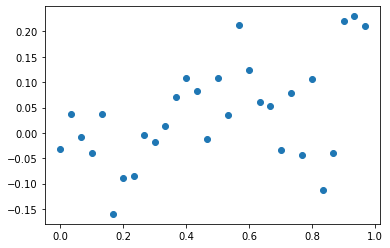

In [20]:
np.random.seed(15)
n = 30
x = np.arange(0, 1, 1/n)
y = np.sin(x)/10+0.1*np.random.normal(size = (n,))
xhat = np.linspace(0,1,10)
#yhat = np.array(estimate(x, y, 0.111, 0.2))
yhat = np.array([estimate(x, y, x0, 0.01) for x0 in xhat])
plt.scatter(x, y)

In [21]:
error_loocv_h = loocv(x, y)

The best h is 0.02


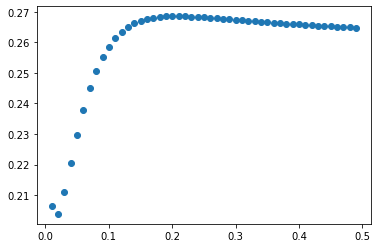

In [22]:
plt.scatter(h, error_loocv_h)

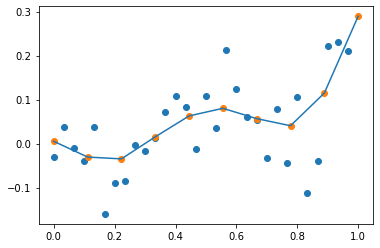

In [23]:
yhat = np.array([estimate(x, y, x0, 0.02) for x0 in xhat])
plt.scatter(x, y)
plt.scatter(xhat, yhat)
plt.plot(xhat, yhat)